### Exercise 1c)

In this section, we analyze ordinary gradient descent for OLS and Ridge regression. 

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from utils import generate_dataset
from methods.training_methods import GradientDescent
from methods.step_methods import ConstantLearningRateStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Generating dataset
np.random.seed(124)
x, y = generate_dataset()

In [3]:
# Define parameters and initial conditions for gradient descent. 
# NOTE: we defined the seed for numpy random in the code block above. Thus, if you run this 
# block several times, then "theta" may not be the same every time. Therefore, it is important 
# that you run the whole notebook in order to generate the same results as in the report. 

p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

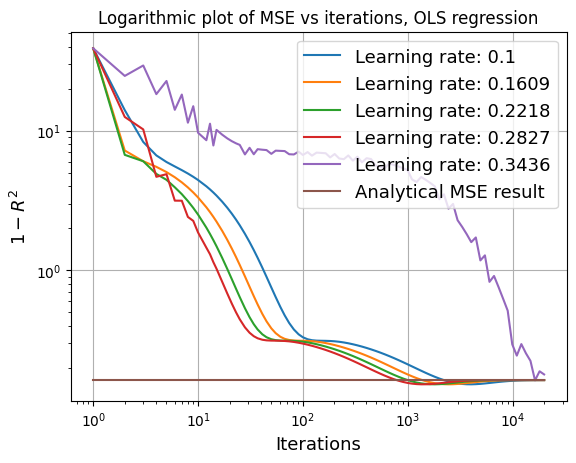

In [4]:
# Ordinary gradient descent for different learning rates, OLS regression
learning_rates = np.linspace(0.1,0.34357,5) 

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=learning_rates[i]))
    One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_1_R2 = gd_constant.analytical_OLS_1_R2()
    plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")

plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical MSE result")
plt.xlabel("Iterations",fontsize = 13)
plt.ylabel(r"$1 - R^2$",fontsize = 13)
plt.title("Logarithmic plot of MSE vs iterations, OLS regression")
plt.loglog()
plt.grid()
plt.legend(loc="upper right",fontsize = 13)

plt.show()

In [5]:
# Finding theoretical value of maximum learning rate for OLS regression

H = gd_constant.OLS_Hessian()

EigValues, EigVectors = np.linalg.eig(H)

print("Maximum learning rate before exponential blowup, OLS regression: ",2/np.max(EigValues))

Maximum learning rate before exponential blowup, OLS regression:  0.34360076154772345


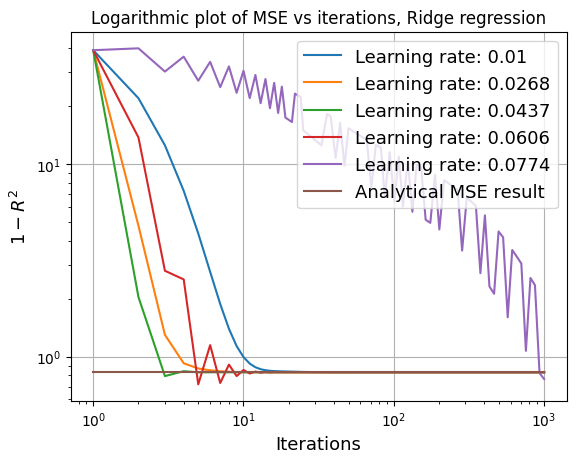

In [6]:
# Ordinary gradient descent for different learning rates, Ridge regression

iterations = 10**3

learning_rates = np.linspace(0.01,0.0774,5)

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=learning_rates[i]))
    One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_1_R2 = gd_constant.analytical_Ridge_1_R2(10**1)
    plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")

plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical MSE result")
plt.xlabel("Iterations",fontsize = 13)
plt.ylabel(r"$1 - R^2$",fontsize = 13)
plt.title("Logarithmic plot of MSE vs iterations, Ridge regression")
plt.loglog()
plt.grid()
plt.legend(loc="upper right",fontsize = 13)

plt.show()

In [7]:
# Finding theoretical value of maximum learning rate for Ridge regression

H = gd_constant.Ridge_Hessian(10**1)

EigValues, EigVectors = np.linalg.eig(H)

print("Maximum learning rate before exponential blowup, Ridge regression: ",2/np.max(EigValues))

Maximum learning rate before exponential blowup, Ridge regression:  0.07745720732058708
